# Forecast

In [418]:
df_test

,RENEWAL_DATE_C,IS_WON,Other_Plan,PlanGrid (Admin Console),PlanGrid (Advanced RFIs),PlanGrid (Crane - Infinite Sheets),PlanGrid (Dozer - 5000 Sheets),PlanGrid (Nailgun - 550 Sheets),PlanGrid (Submittals - Up to 50 Users),PlanGrid (Workspaces),...,field_report,home,issue,link,nav,photo,project,projecthub,sheet,team
OPPORTUNITY_ID,,,,,,,,,,,,,,,,,,,,,
opp1,2020-04-23 00:00:00,0.0,0,0,0,0,1,1,0,0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
opp10,2020-04-23 00:00:00,0.0,0,0,0,1,1,0,0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
opp100,2020-04-29 00:00:00,0.0,0,0,0,0,0,1,1,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
opp102,2020-04-30 00:00:00,0.0,0,0,0,0,1,0,0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
opp107,2020-04-21 00:00:00,0.0,0,0,0,0,0,1,0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
opp88,2020-04-30 00:00:00,0.0,0,1,0,0,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
opp89,2020-04-25 00:00:00,0.0,0,0,0,0,0,1,0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
opp9,2020-04-25 00:00:00,0.0,0,1,0,0,1,1,0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [419]:
df_test2=df_test.copy()

In [420]:
X_test = df_test2.drop(['RENEWAL_DATE_C','IS_WON'], axis=1)
lr_pred_test = lr.predict_proba(X_test)[:,1]

In [421]:
df_final=df_test2[['RENEWAL_DATE_C']]
df_final.reset_index(inplace=True)
df_final.insert(2, "WIN_PROBABILITY",lr_pred_test , True)
df_final

,OPPORTUNITY_ID,RENEWAL_DATE_C,WIN_PROBABILITY
0,opp1,2020-04-23 00:00:00,0.945845
1,opp10,2020-04-23 00:00:00,0.715583
2,opp100,2020-04-29 00:00:00,0.455370
3,opp102,2020-04-30 00:00:00,0.355503
4,opp107,2020-04-21 00:00:00,0.462653
...,...,...,...
223,opp88,2020-04-30 00:00:00,0.987783
224,opp89,2020-04-25 00:00:00,0.181482
225,opp9,2020-04-25 00:00:00,0.959820
226,opp93,2020-04-23 00:00:00,0.355503


In [422]:
df_final2=df_final.copy()

In [423]:
df_final2['RENEWAL_DATE_C'] = pd.to_datetime(df_final2['RENEWAL_DATE_C']).dt.date


In [424]:
df_final2

,OPPORTUNITY_ID,RENEWAL_DATE_C,WIN_PROBABILITY
0,opp1,2020-04-23,0.945845
1,opp10,2020-04-23,0.715583
2,opp100,2020-04-29,0.455370
3,opp102,2020-04-30,0.355503
4,opp107,2020-04-21,0.462653
...,...,...,...
223,opp88,2020-04-30,0.987783
224,opp89,2020-04-25,0.181482
225,opp9,2020-04-25,0.959820
226,opp93,2020-04-23,0.355503


In [427]:
df_final2.to_csv(r'C:\Users\19498\Desktop\Nikkhah_Result.csv',index=False)

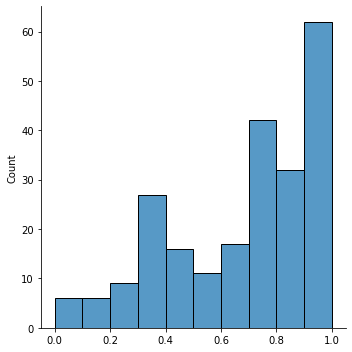

In [432]:
sns.displot(lr_pred_test,bins=[0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8,0.9,1])